#EDA

## Load and Decribe

In [177]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'data for model.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary statistics of the dataset to understand its structure
data_info = data.info()
data_head = data.head()
data_description = data.describe()

data_info, data_head, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4035 entries, 0 to 4034
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4035 non-null   object 
 1   Open                      4035 non-null   float64
 2   High                      4035 non-null   float64
 3   Low                       4035 non-null   float64
 4   Close                     4035 non-null   float64
 5   Adj Close                 4035 non-null   float64
 6   Volume                    4035 non-null   float64
 7   Close_diff                4034 non-null   float64
 8   Close_Lag1                4034 non-null   float64
 9   Open_Lag1                 4034 non-null   float64
 10  High_Lag1                 4034 non-null   float64
 11  Low_Lag1                  4034 non-null   float64
 12  SMA_5                     4031 non-null   float64
 13  SMA_10                    4027 non-null   float64
 14  RSI_14  

(None,
    Unnamed: 0       Open       High        Low      Close  Adj Close   Volume  \
 0  2008-06-25  52.250000  52.980000  52.250000  52.770000  37.889431   2000.0   
 1  2008-06-26  60.000000  60.000000  50.990002  51.060001  36.661633   9800.0   
 2  2008-06-27  50.790001  50.790001  50.090000  50.160000  36.015419   7700.0   
 3  2008-06-30  50.770000  50.959999  50.250000  50.250000  36.080048  17100.0   
 4  2008-07-01  50.000000  50.000000  48.060001  48.799999  35.038921  14900.0   
 
    Close_diff  Close_Lag1  Open_Lag1  ...  close_600900_constituent  \
 0         NaN         NaN        NaN  ...                  9.766666   
 1   -0.032405   52.770000  52.250000  ...                  9.766666   
 2   -0.017626   51.060001  60.000000  ...                  9.766666   
 3    0.001794   50.160000  50.790001  ...                  9.766666   
 4   -0.028856   50.250000  50.770000  ...                  9.766666   
 
    close_ED_constituent  close_ENPH_constituent  close_FSLR_cons

## Data Distributions

### Histograms

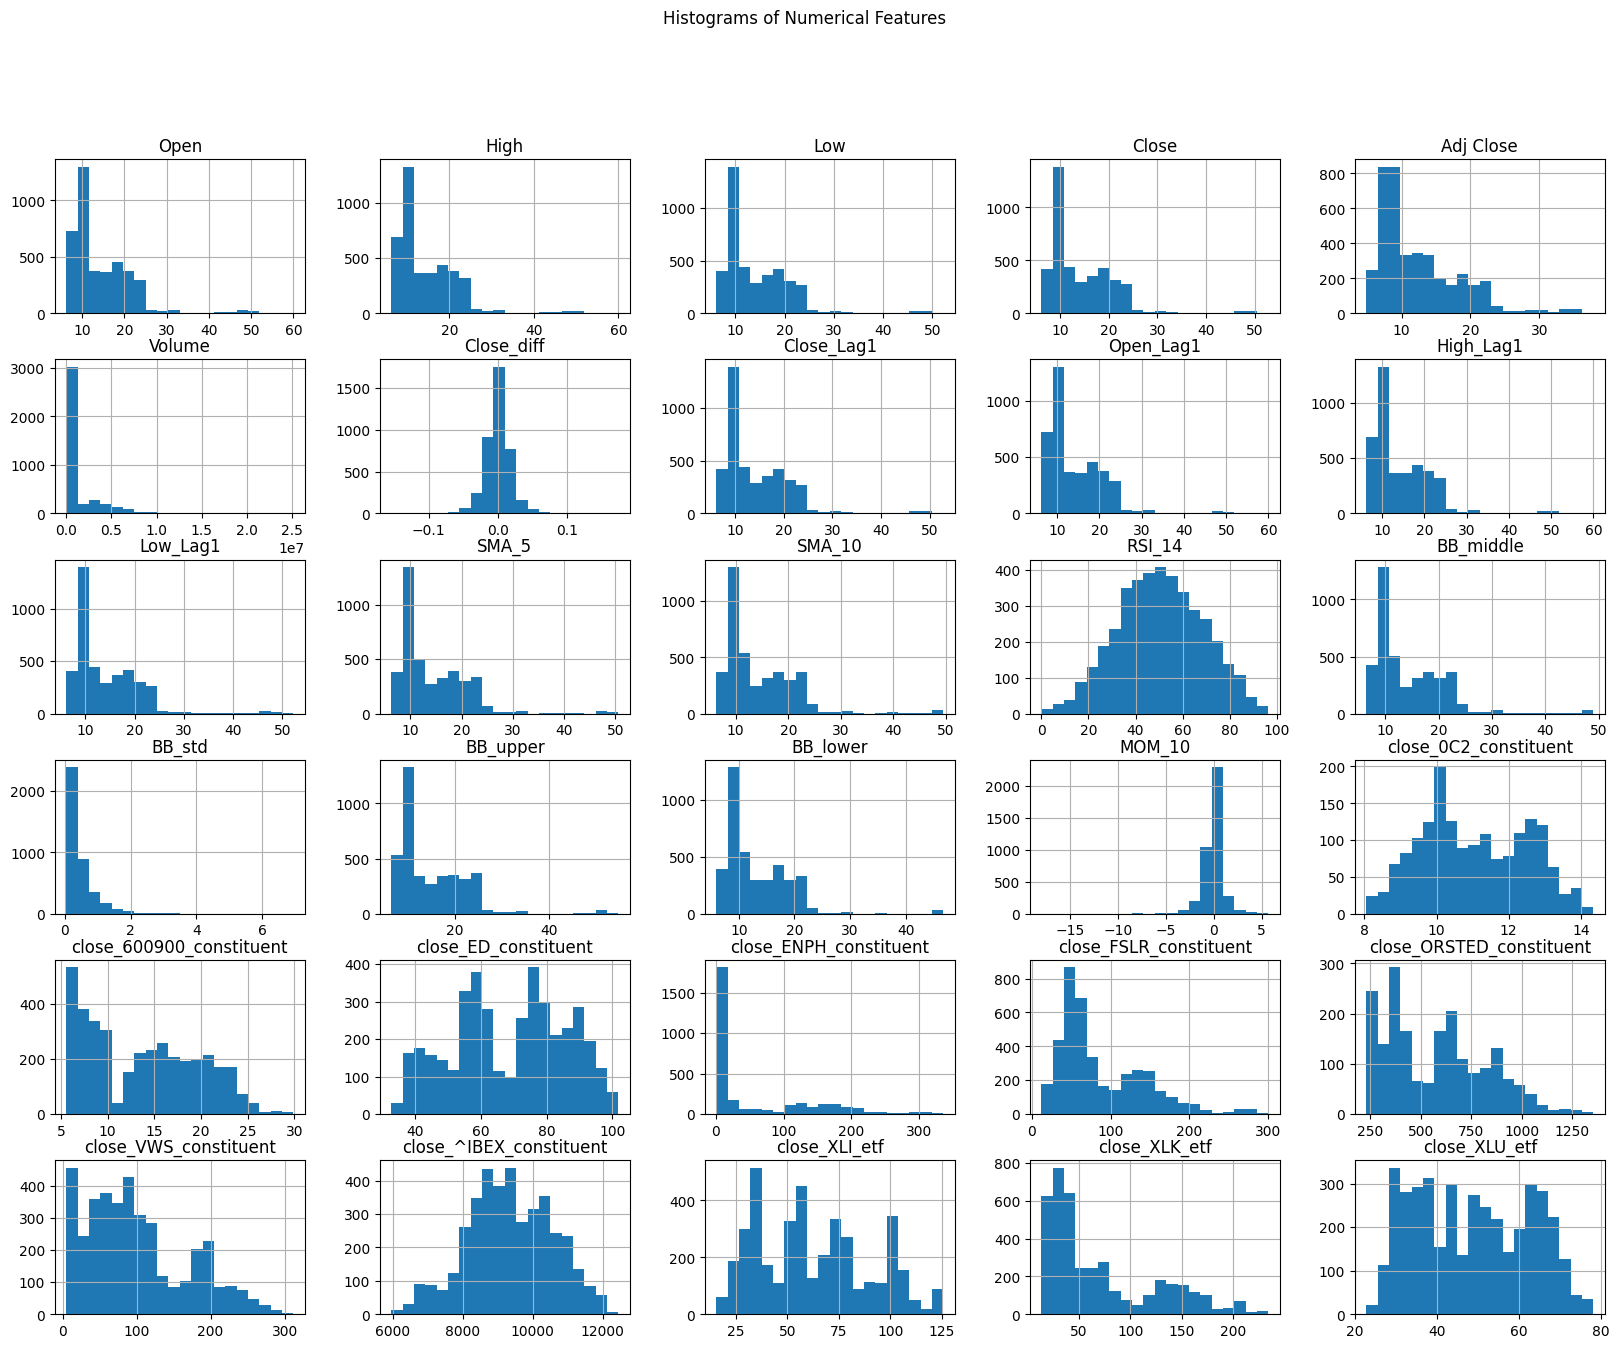

In [50]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical features
data.hist(figsize=(20, 15), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()


### Boxplots

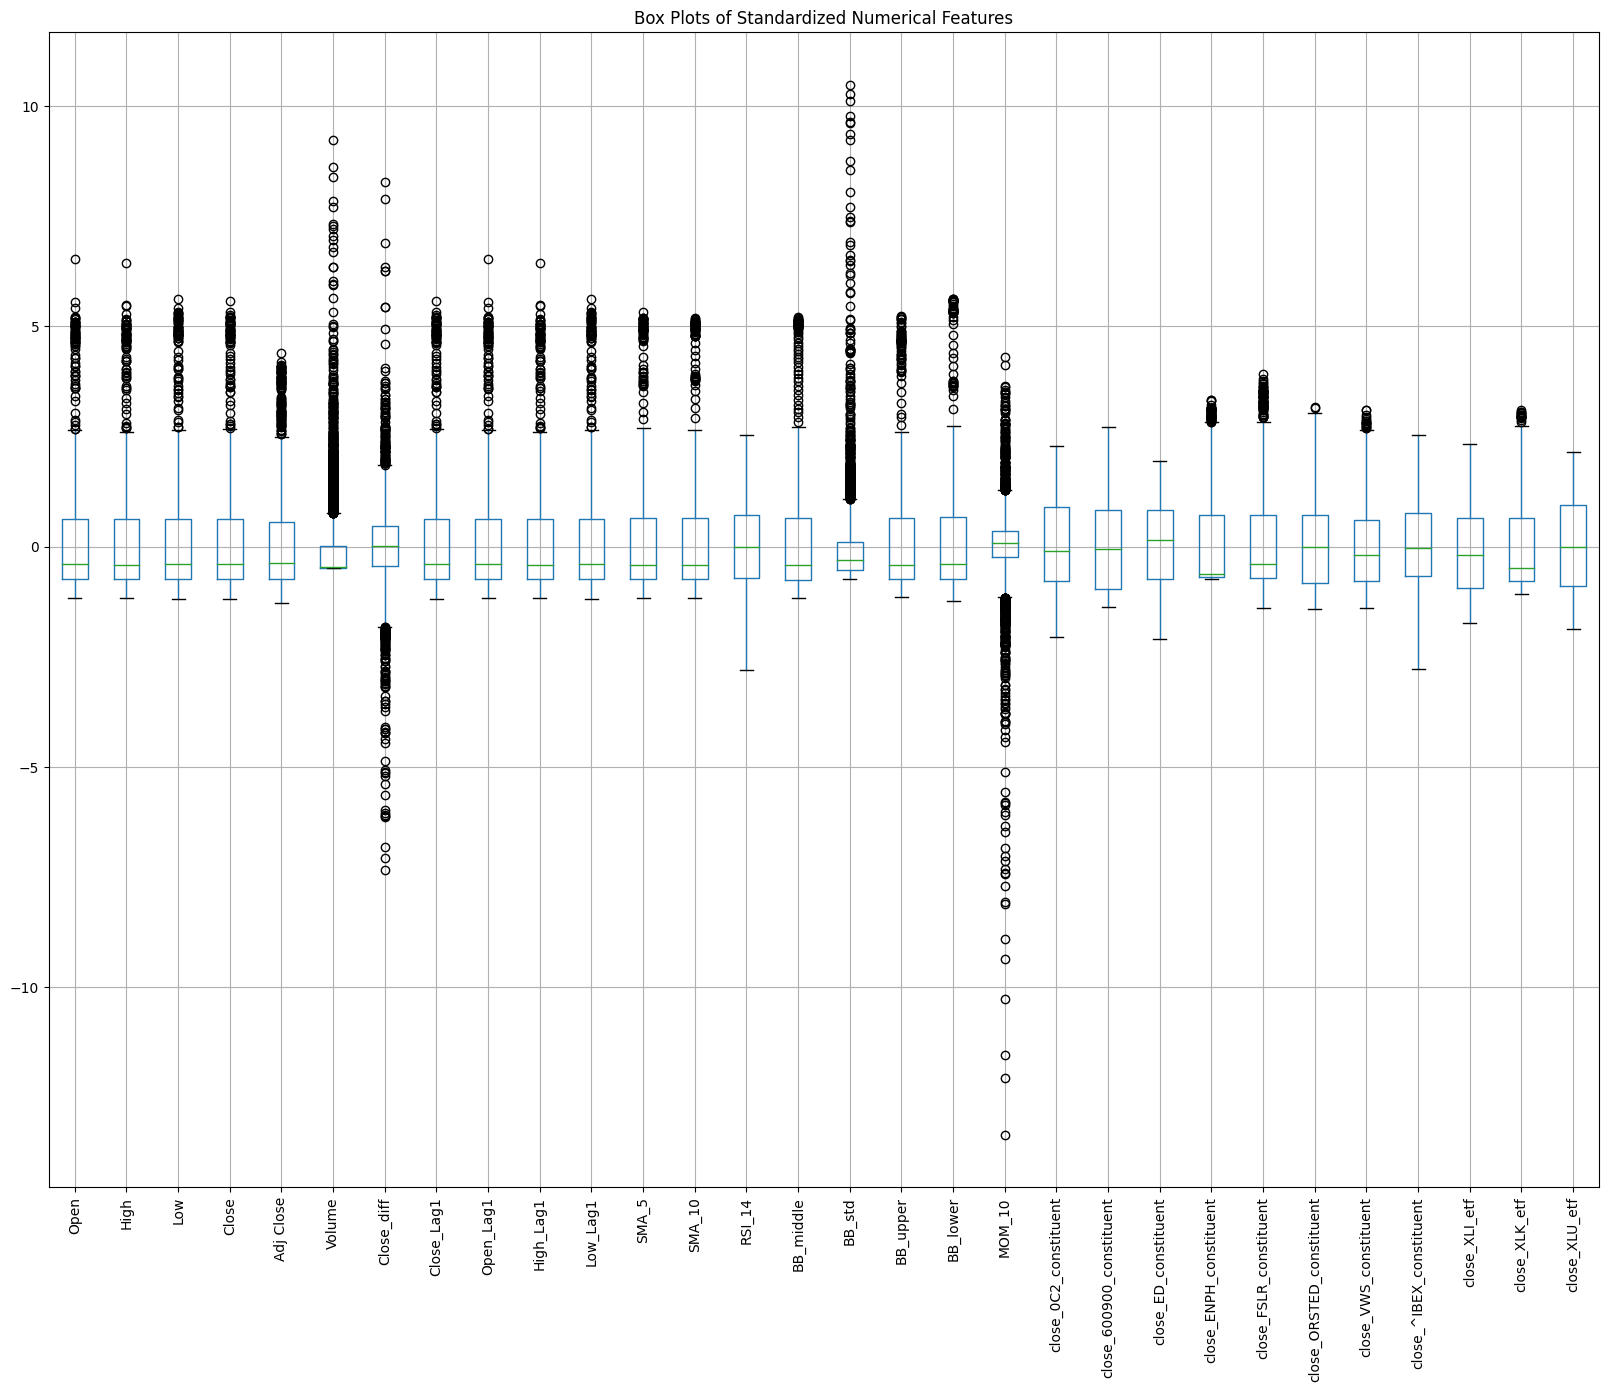

In [56]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=['float64'])),
                           columns=data.select_dtypes(include=['float64']).columns)

# Plot standardized box plots
plt.figure(figsize=(20, 15))
data_scaled.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plots of Standardized Numerical Features')
plt.show()


### Density Plots

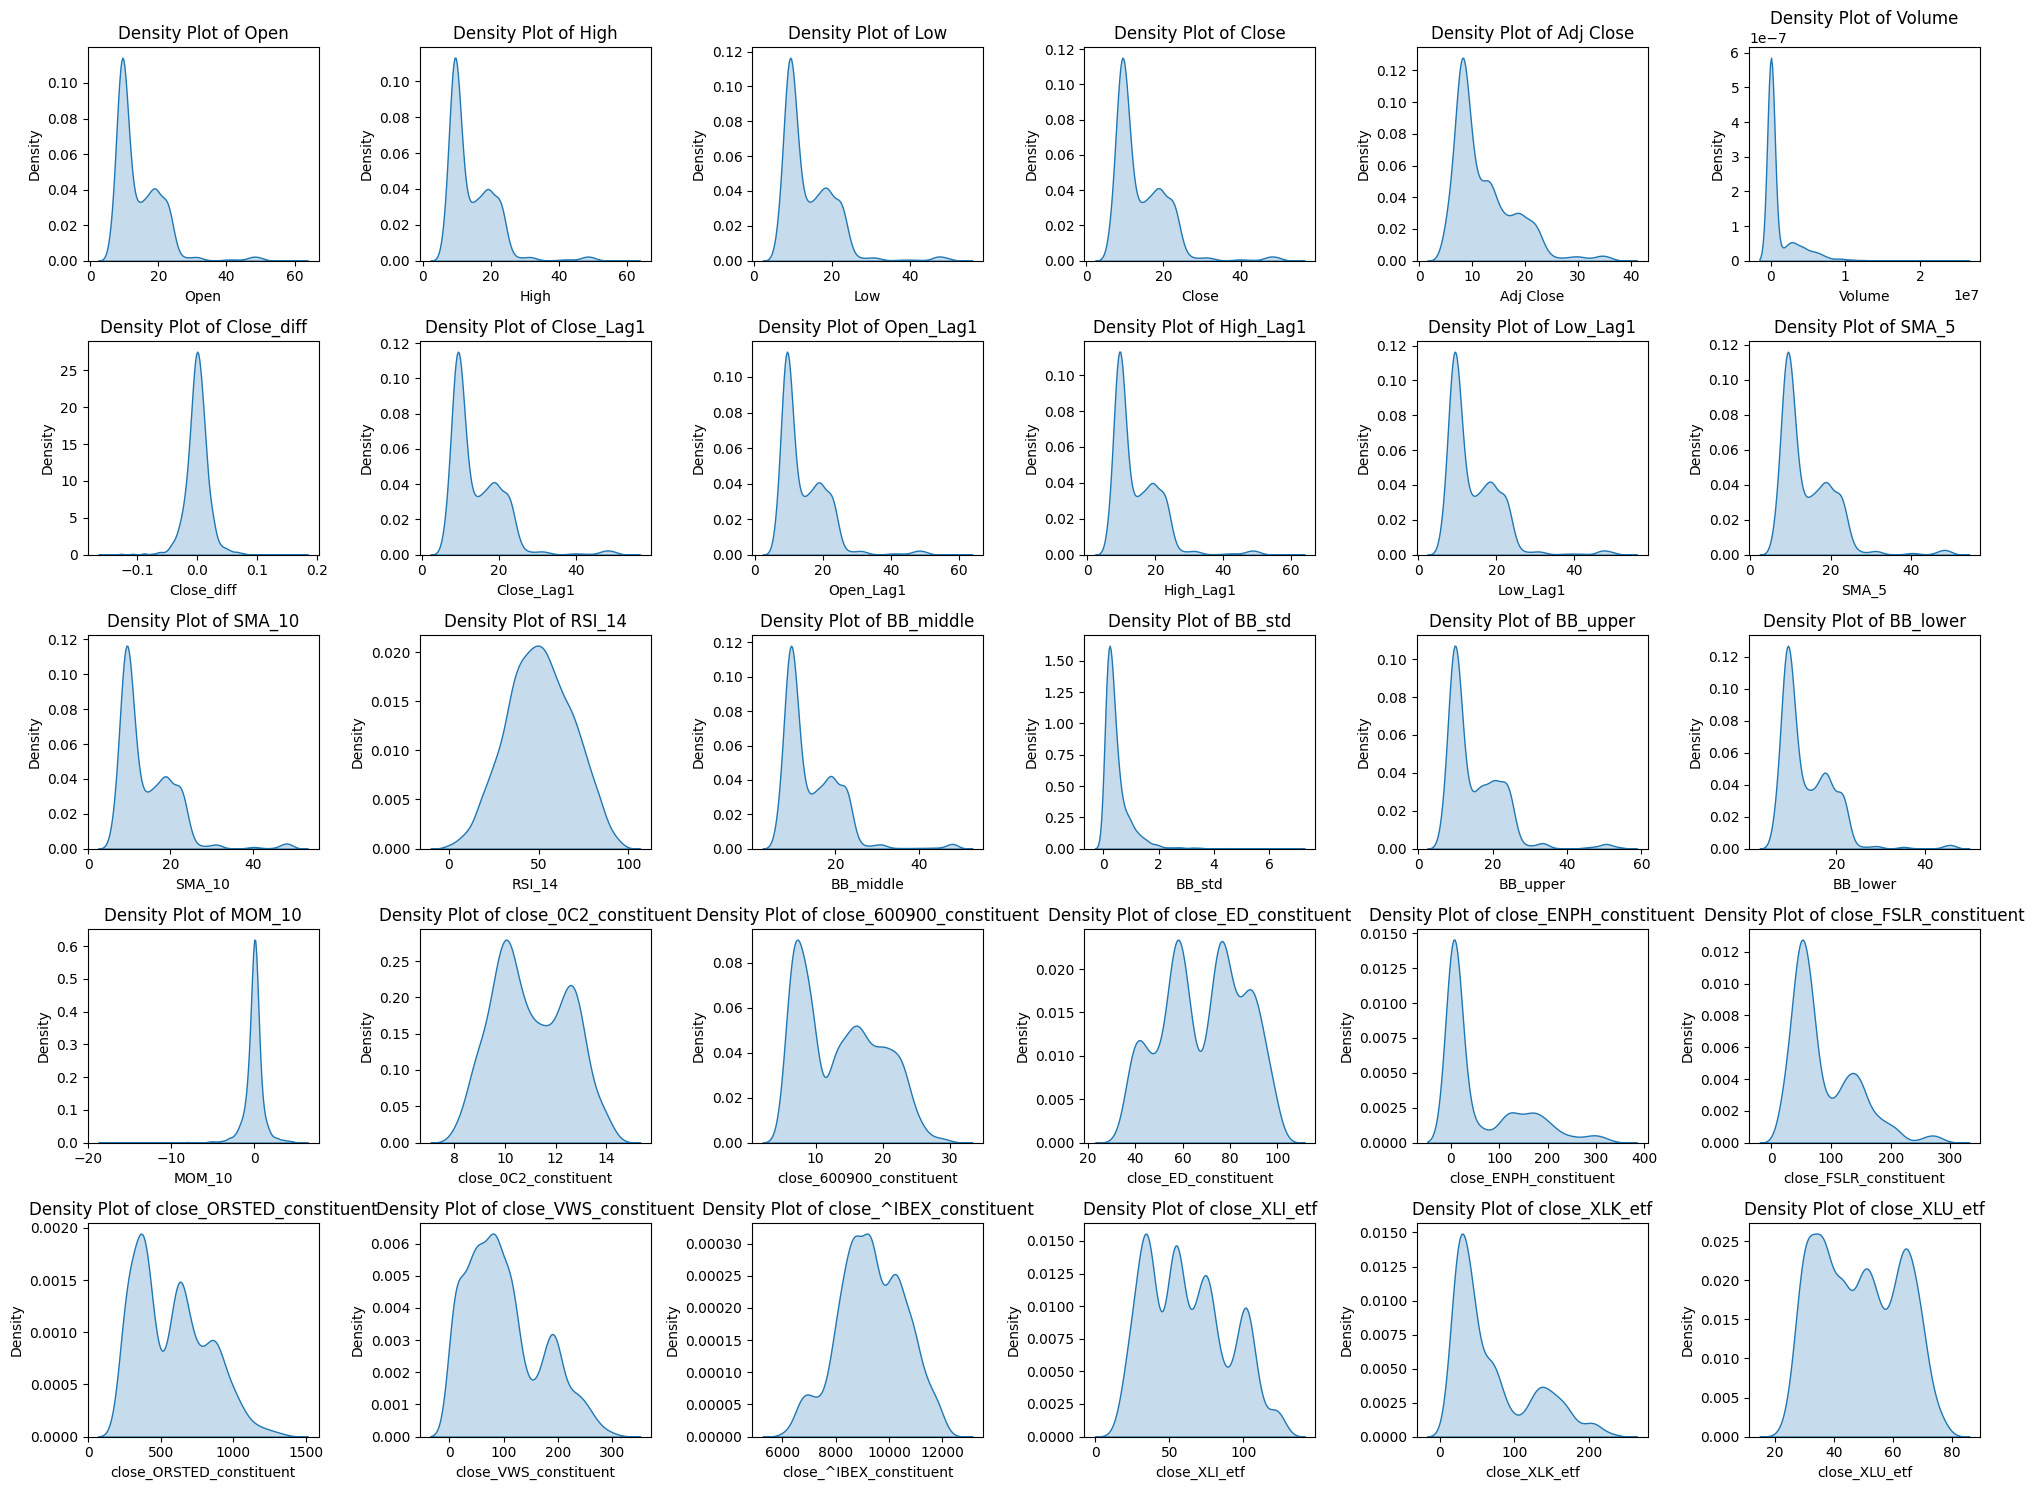

In [60]:

import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Plot density plots for selected numerical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.select_dtypes(include=['float64']).columns):
    plt.subplot(5, 6, i+1)
    sns.kdeplot(data[column], shade=True)
    plt.title(f'Density Plot of {column}')
plt.tight_layout()
plt.show()


##  Identify  Outliers _might delete , leaves us with not enought data

In [65]:
import numpy as np
import pandas as pd

# Assuming 'data_imputed_corrected' is your DataFrame

def identify_outliers_iqr(df):
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.select_dtypes(include=['float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Identify outliers in the dataset
outliers = identify_outliers_iqr(data)
print(outliers)


     Unnamed: 0       Open       High        Low      Close  Adj Close  \
0           NaN  52.250000  52.980000  52.250000  52.770000  37.889431   
1           NaN  60.000000  60.000000  50.990002  51.060001  36.661633   
2           NaN  50.790001  50.790001  50.090000  50.160000  36.015419   
3           NaN  50.770000  50.959999  50.250000  50.250000  36.080048   
4           NaN  50.000000  50.000000  48.060001  48.799999  35.038921   
...         ...        ...        ...        ...        ...        ...   
70          NaN  34.380001  35.680000  33.410000  33.410000        NaN   
73          NaN  33.599998  33.599998        NaN        NaN        NaN   
3156        NaN  32.970001  33.790001  32.619999  33.410000  32.067238   
3157        NaN  34.150002  34.250000  32.630001  33.160000  31.827282   
3167        NaN  32.990002  33.570000        NaN        NaN  31.174616   

          Volume  Close_diff  Close_Lag1  Open_Lag1  ...  \
0            NaN         NaN         NaN        NaN

In [69]:
def remove_outliers_iqr(df):
    for column in df.select_dtypes(include=['float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the dataset
data_no_outliers = remove_outliers_iqr(data)
print(data_no_outliers.shape)

(1296, 31)


In [70]:
def cap_outliers_iqr(df):
    for column in df.select_dtypes(include=['float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Cap outliers in the dataset
data_capped = cap_outliers_iqr(data)
print(data_capped.shape)  # Check summary statistics after capping


(4035, 31)


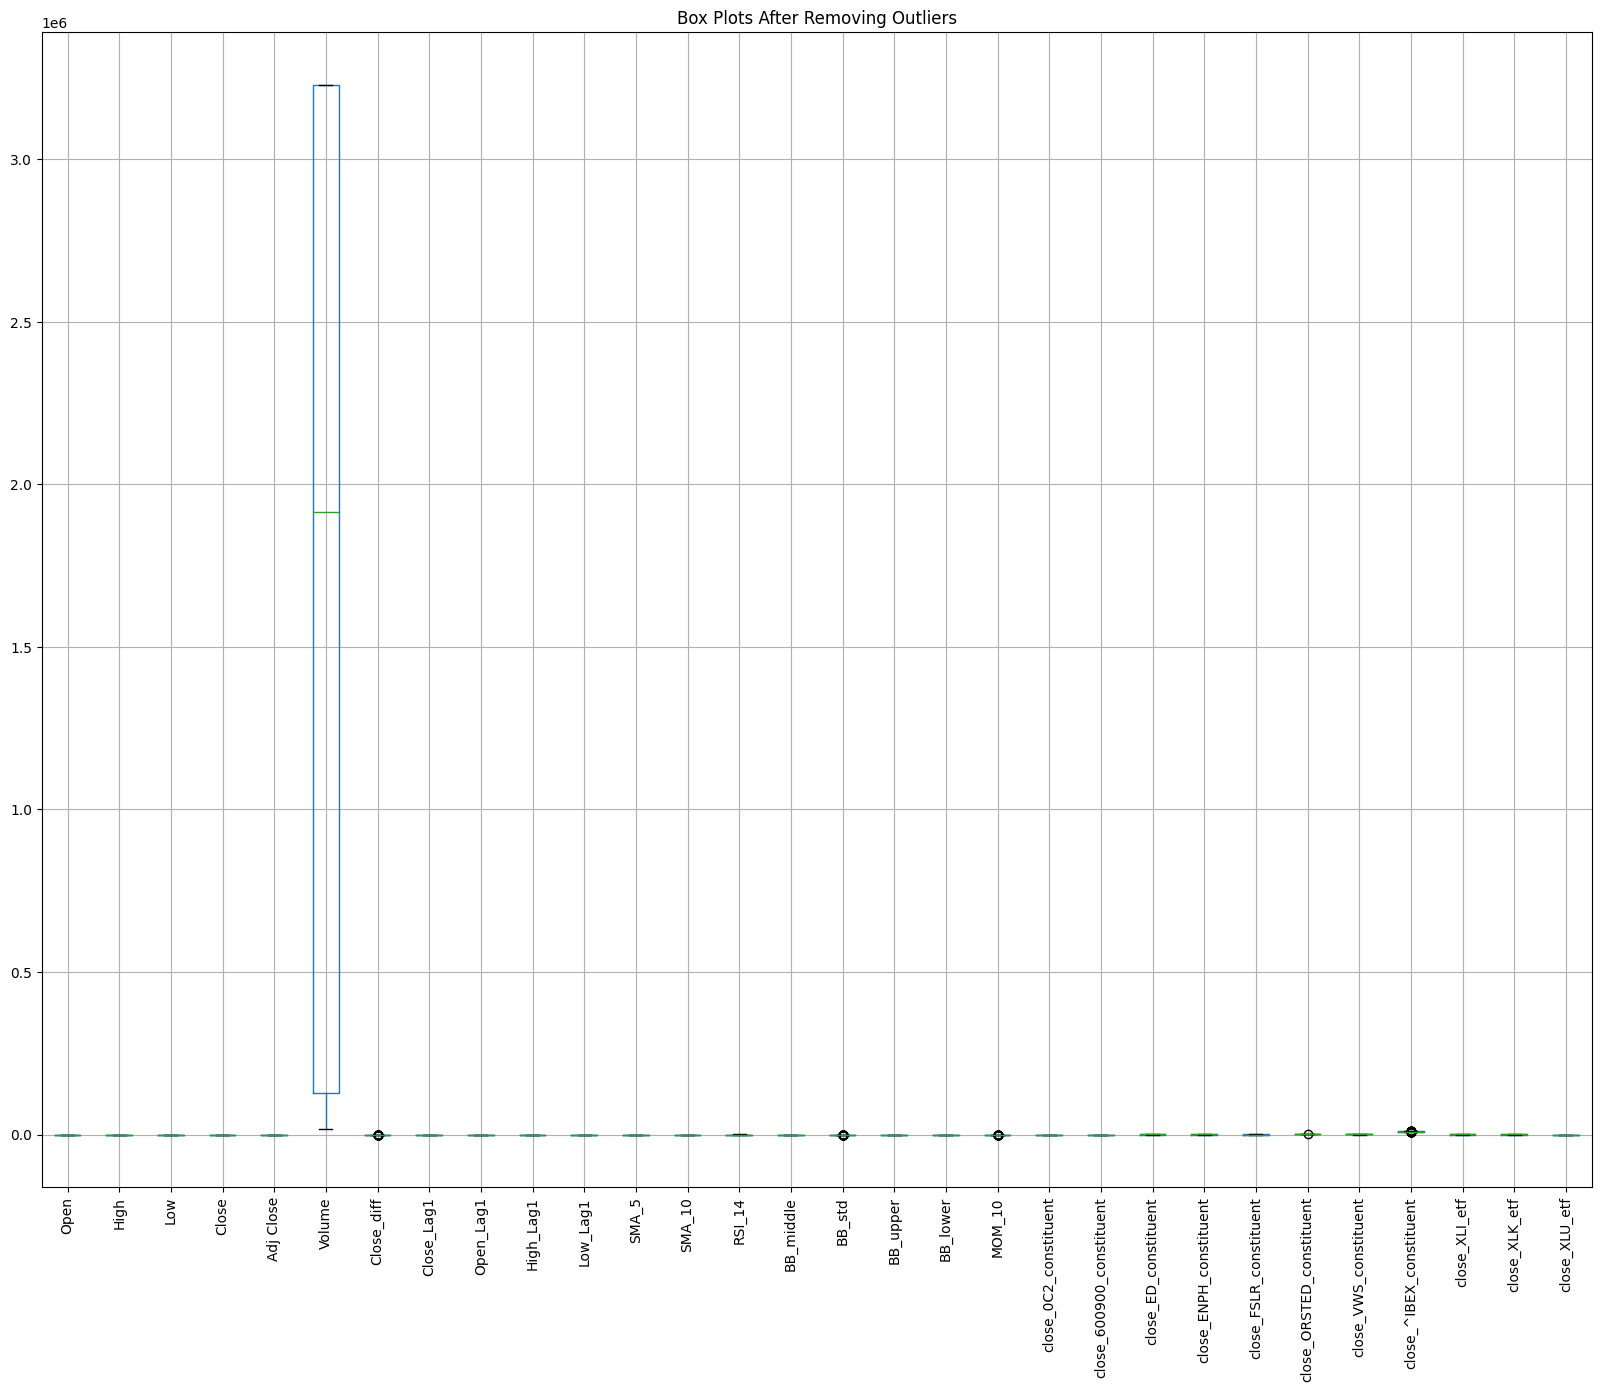

In [71]:
import matplotlib.pyplot as plt

# Box plot after removing outliers
plt.figure(figsize=(20, 15))
data_no_outliers.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plots After Removing Outliers')
plt.show()




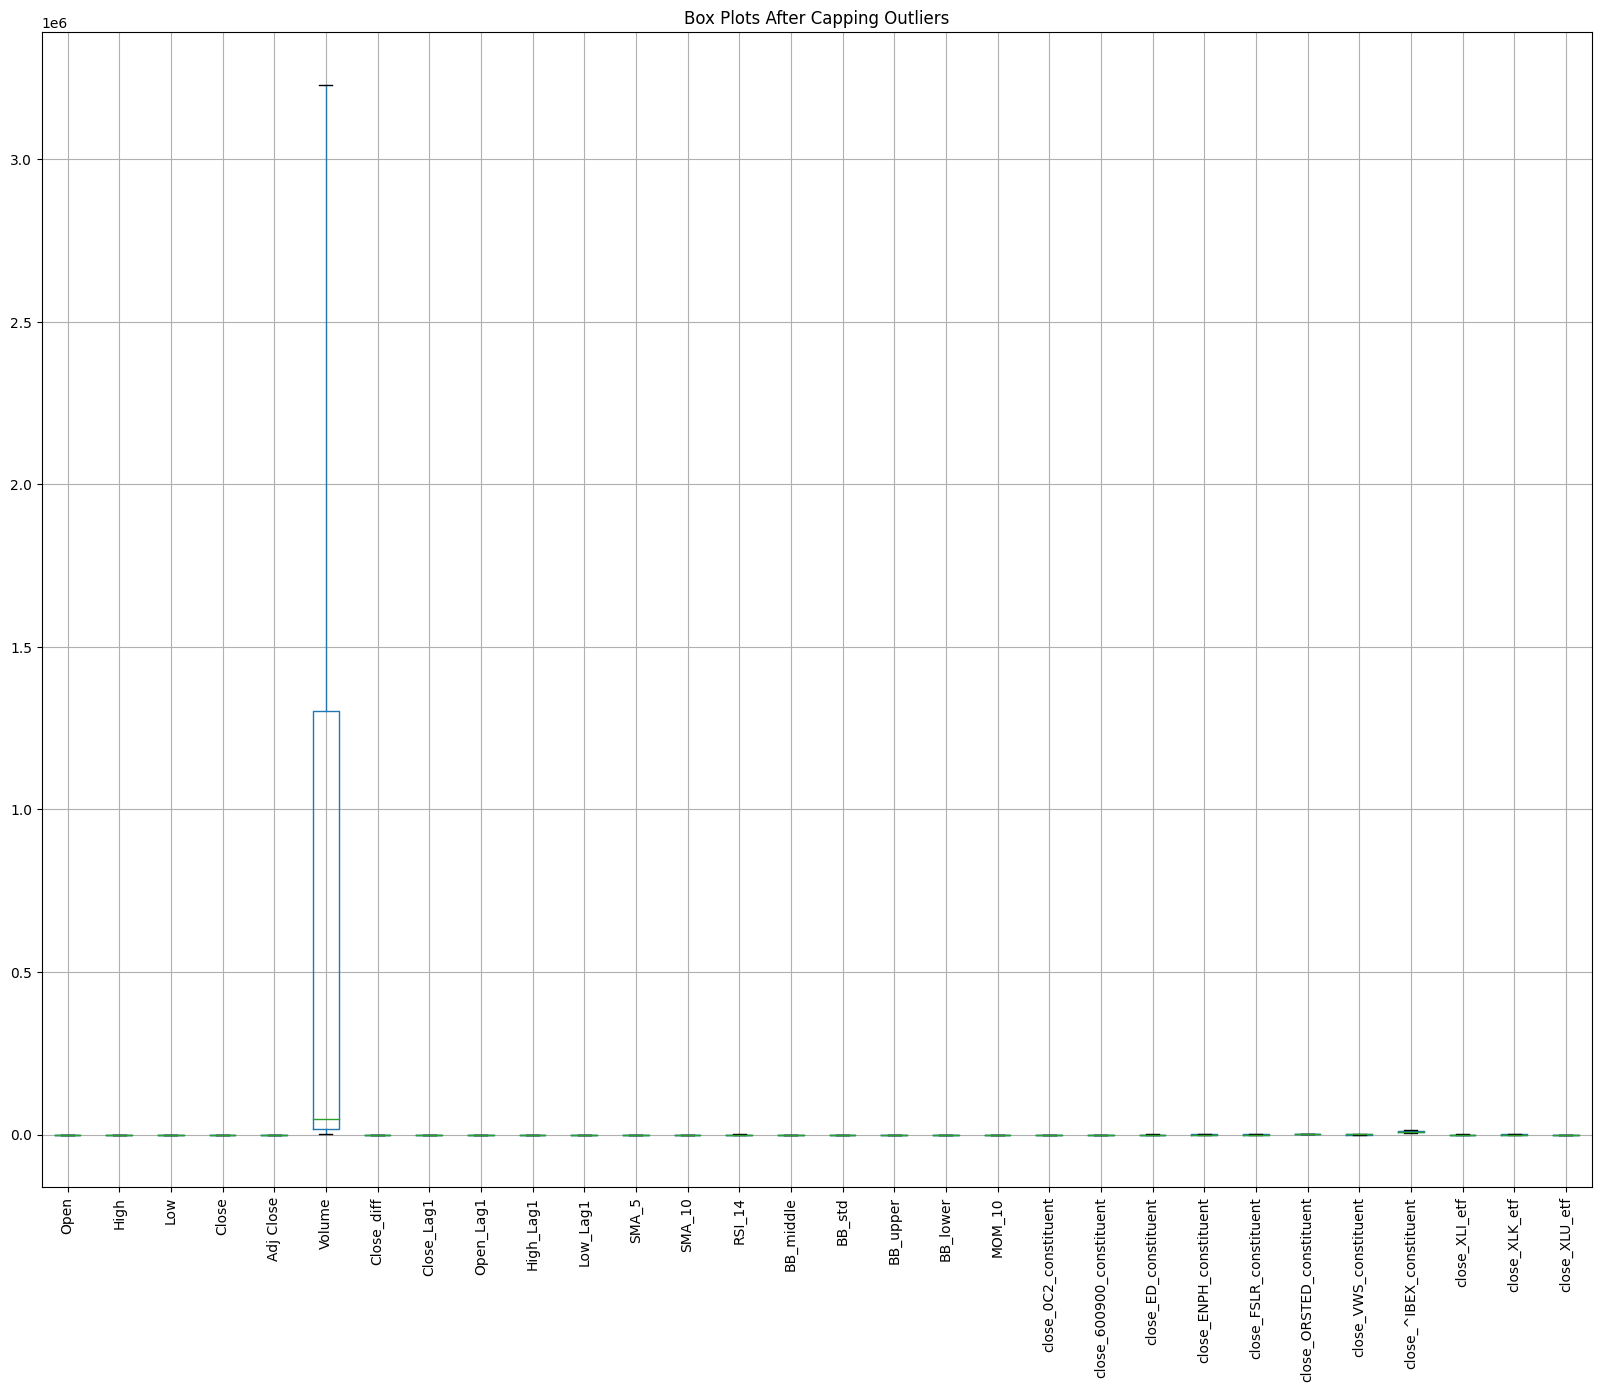

In [72]:
# Box plot after capping outliers
plt.figure(figsize=(20, 15))
data_capped.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plots After Capping Outliers')
plt.show()

## Missing values handling

In [144]:
# Calculate the percentage of missing values in each column
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a DataFrame to display the column names and their corresponding percentage of missing values
missing_data_df = pd.DataFrame({

    'Missing Values (%)': missing_percentage
}).sort_values(by='Missing Values (%)', ascending=False)

print(missing_data_df)


                          Missing Values (%)
close_0C2_constituent              57.967782
close_ORSTED_constituent           51.201983
close_ENPH_constituent             23.543990
close_600900_constituent            6.666667
close_VWS_constituent               3.246592
close_^IBEX_constituent             1.016109
BB_lower                            0.446097
BB_upper                            0.446097
BB_std                              0.446097
BB_middle                           0.446097
RSI_14                              0.297398
MOM_10                              0.223048
SMA_10                              0.198265
SMA_5                               0.099133
High_Lag1                           0.024783
Open_Lag1                           0.024783
Close_Lag1                          0.024783
Close_diff                          0.024783
Low_Lag1                            0.024783
close_FSLR_constituent              0.000000
close_XLI_etf                       0.000000
close_XLK_

### Dropping missing value Columns and Missing Values Imputaion  

In [178]:
#droping columns which had to much missing values
data.drop(columns=['close_0C2_constituent', "close_ORSTED_constituent", "close_ENPH_constituent"])




# Separate the date column from the rest of the data
date_column = 'Unnamed: 0'  # Assuming this is the date column based on the data structure
numeric_data = data.drop(columns=[date_column])
date_data = data[date_column]

# Impute missing values for numeric columns using the median
numeric_data_imputed = numeric_data.fillna(numeric_data.median())

# Combine the date column back with the imputed numeric data
data_imputed = pd.concat([date_data, numeric_data_imputed], axis=1)

# Recheck the data for any remaining missing values
missing_values_corrected = data_imputed.isnull().sum()

missing_values_corrected


,0
Unnamed: 0,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Close_diff,0
Close_Lag1,0
Open_Lag1,0


## Pair plot with selected features

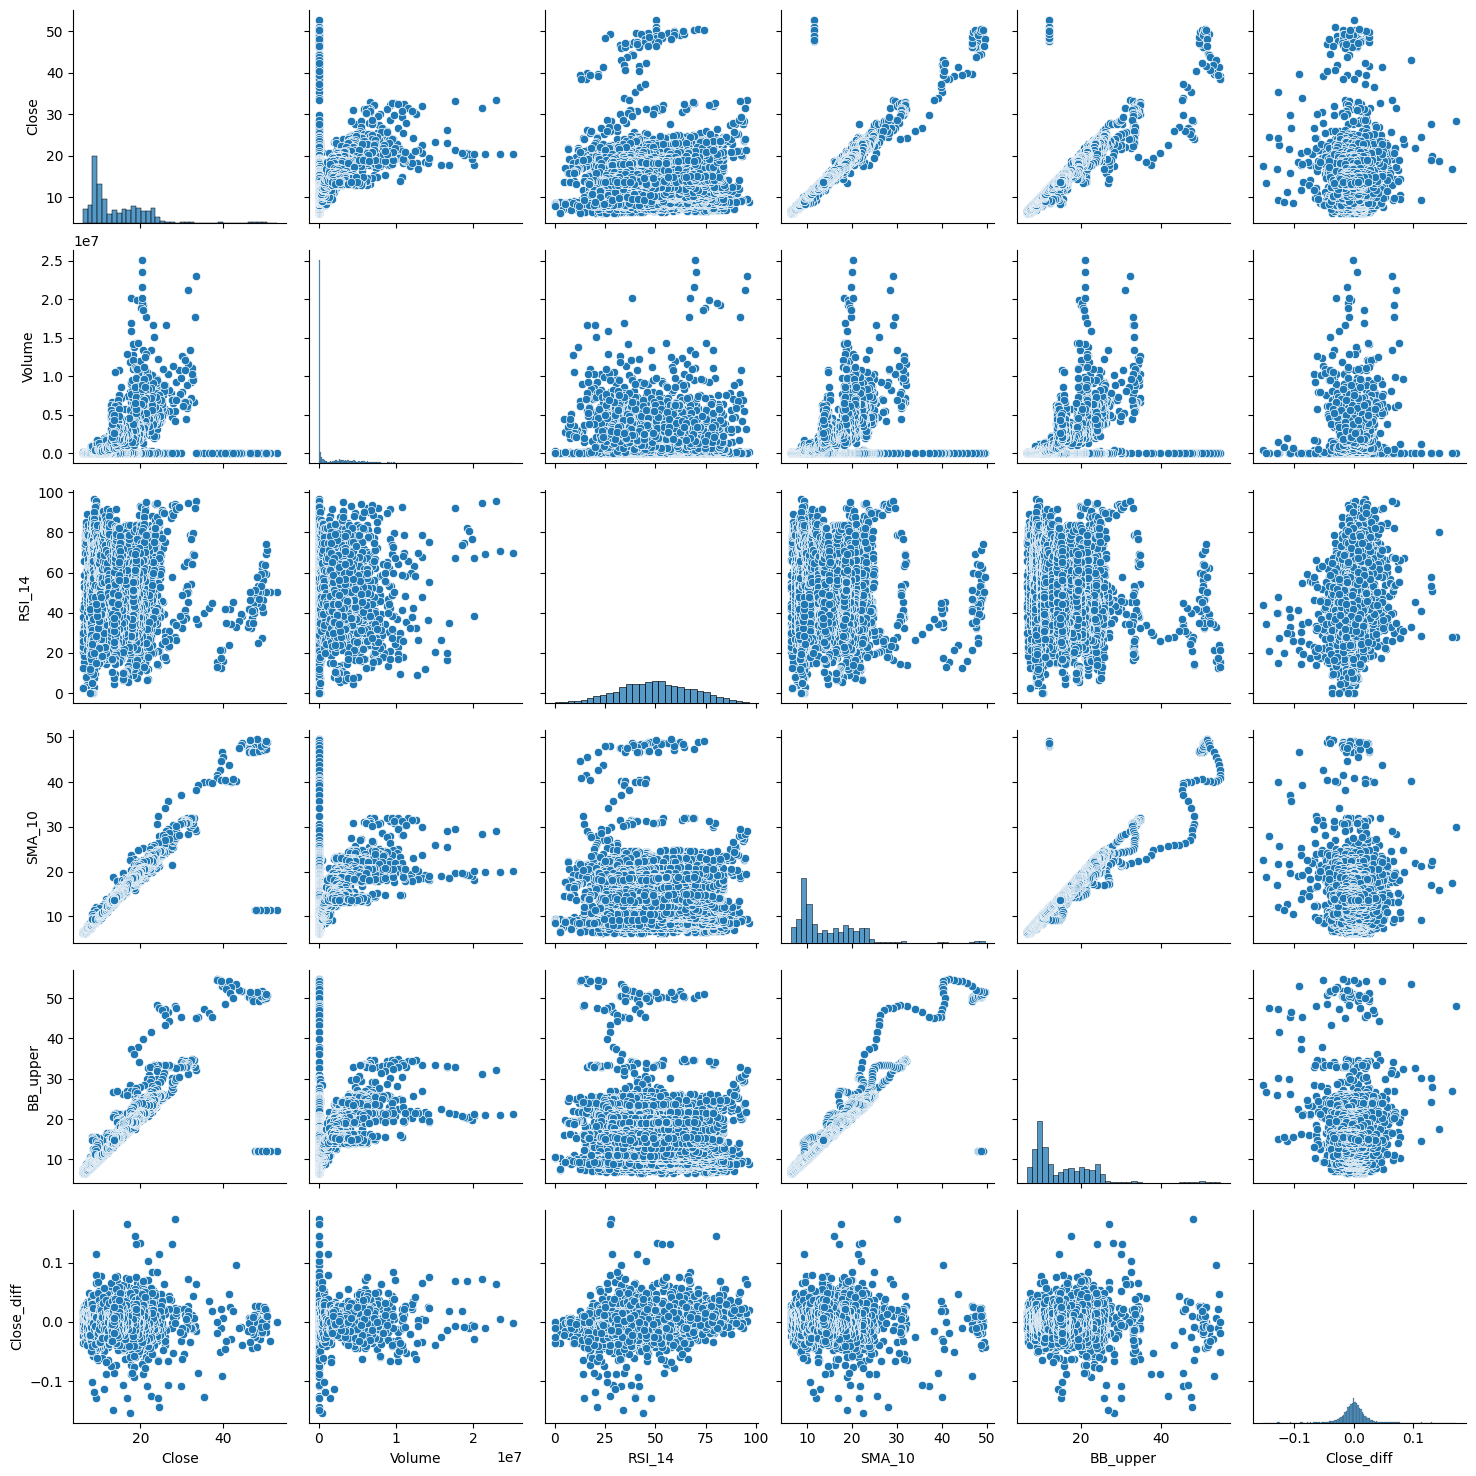

In [38]:
# Pairplot of a few selected features to see relationships and distributions
selected_features = ['Close', 'Volume', 'RSI_14', 'SMA_10', 'BB_upper', 'Close_diff'] # you can change the features
sns.pairplot(data_imputed[selected_features])
plt.show()

## Feature Engineering

### Create New Features

In [147]:
# Example: Create a new feature by multiplying 'High' and 'Low'
data_imputed['High_Low_Product'] = data_imputed['High'] * data_imputed['Low']
# Example: Create a ratio feature between 'Close' and 'Volume'
data_imputed['Close_Volume_Ratio'] = data_imputed['Close'] / data_imputed['Volume']
# Example: Create a 7-day moving average of 'Close'
data_imputed['7_day_MA'] = data_imputed['Close'].rolling(window=7).mean()


### Evaluate New Features

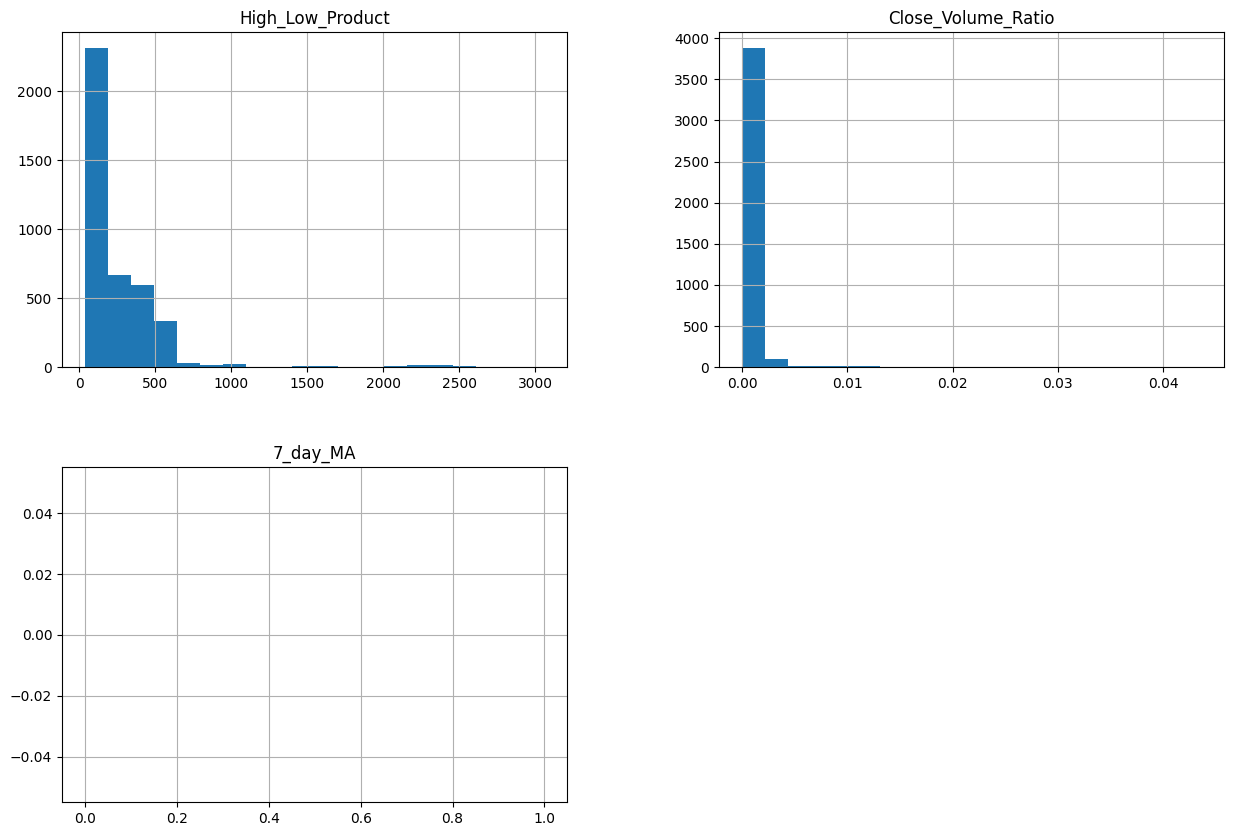

In [148]:
import matplotlib.pyplot as plt

# Example: Visualize new feature distributions
data_imputed[['High_Low_Product', 'Close_Volume_Ratio', '7_day_MA']].hist(figsize=(15, 10), bins=20)
plt.show()


### Transform Features

In [100]:
# Example: Apply log transformation to 'Volume' to reduce skewness
data_imputed['Log_Volume'] = np.log(data_imputed['Volume'] + 1)  # Add 1 to avoid log(0)
from sklearn.preprocessing import PolynomialFeatures

# Example: Create polynomial features for 'Close'
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_imputed[['Close']])
data_poly = pd.DataFrame(poly_features, columns=['Close', 'Close^2'])
data_imputed = pd.concat([data_imputed, data_poly], axis=1)



###  Feature Selection

#### Correlation Analysis

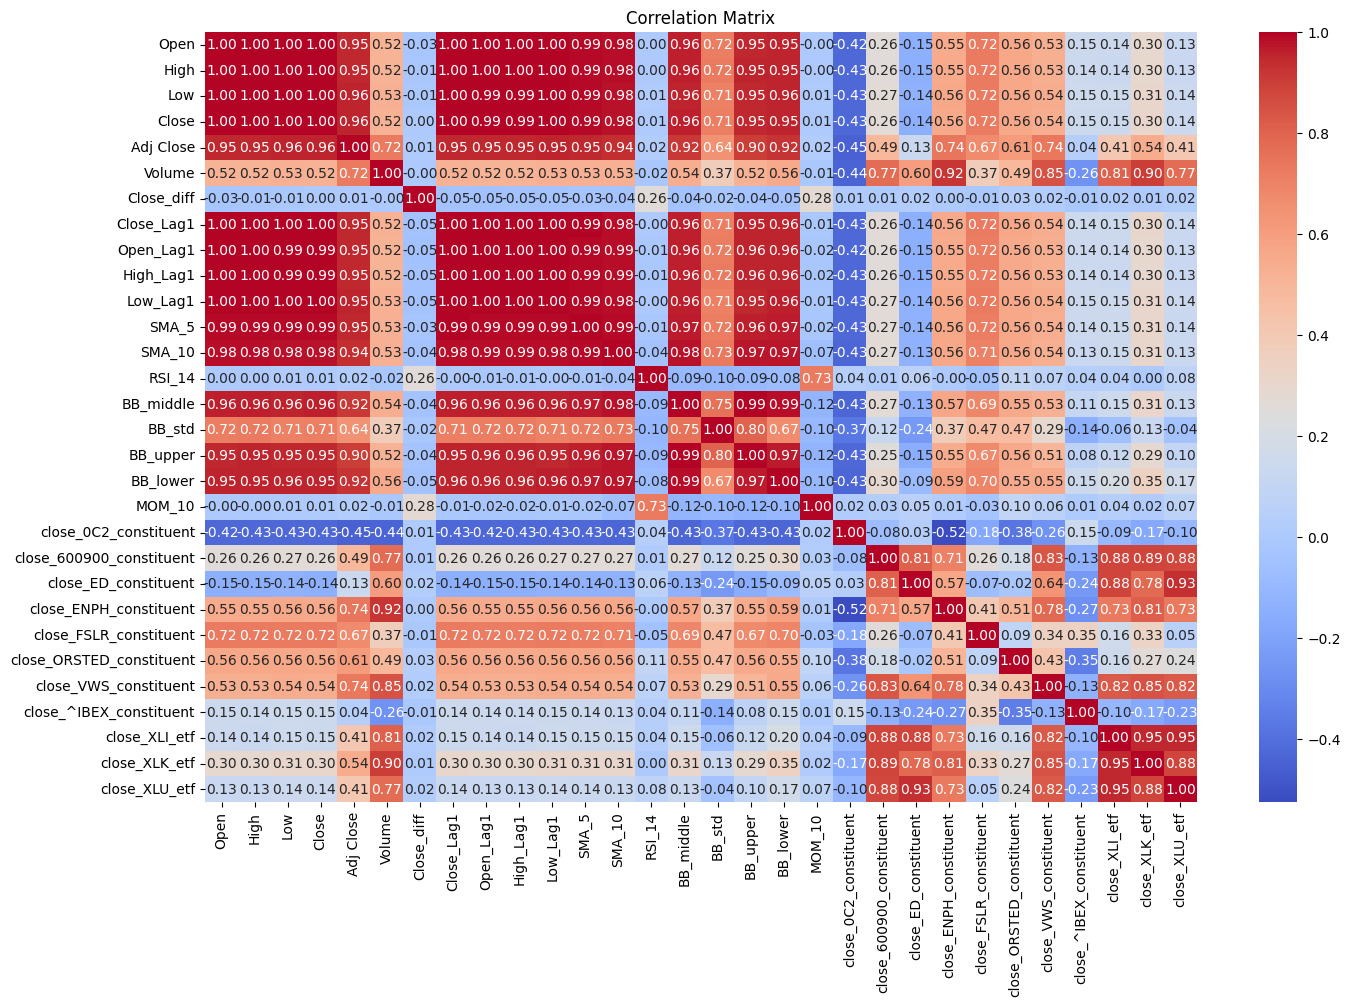

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations
plt.figure(figsize=(16, 10))

# Correlation heatmap
correlation_matrix = numeric_data_imputed.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [79]:
# Example: Remove features with high correlation
corr_matrix = numeric_data_imputed.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
data_imputed_corrected = data_imputed.drop(columns=to_drop)


#### Feature Importance - check for more fetures

In [84]:
from sklearn.ensemble import RandomForestRegressor

# Example: Fit a Random Forest model to determine feature importance
X = numeric_data_imputed.drop(columns=['Close'])  # Replace 'Close' with your target variable
y = numeric_data_imputed['Close']
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top 10 features
top_10_features = X.columns[indices[:10]]
data_top_10 = numeric_data_imputed[top_10_features]


## Noramlity tests

In [39]:
# Perform normality tests (Shapiro-Wilk test) on all numeric columns
from scipy.stats import shapiro

normality_tests_all = {}
for column in numeric_data_imputed.columns:
    stat, p_value = shapiro(numeric_data_imputed[column])
    normality_tests_all[column] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}

# Converting results to a DataFrame for easy viewing
normality_tests_all_df = pd.DataFrame(normality_tests_all).T

# Display the results
print(normality_tests_all_df)


                          Shapiro-Wilk Statistic       p-value
Open                                    0.809902  2.357769e-56
High                                    0.811033  3.015432e-56
Low                                     0.811293  3.191658e-56
Close                                   0.812755  4.396752e-56
Adj Close                               0.869976  9.299665e-50
Volume                                  0.555365  1.205449e-72
Close_diff                              0.892419  1.260611e-46
Close_Lag1                              0.812709  4.353099e-56
Open_Lag1                               0.809860  2.336411e-56
High_Lag1                               0.810989  2.986452e-56
Low_Lag1                                0.811249  3.160848e-56
SMA_5                                   0.815412  7.914405e-56
SMA_10                                  0.817057  1.142755e-55
RSI_14                                  0.996020  6.064341e-09
BB_middle                               0.823197  4.616

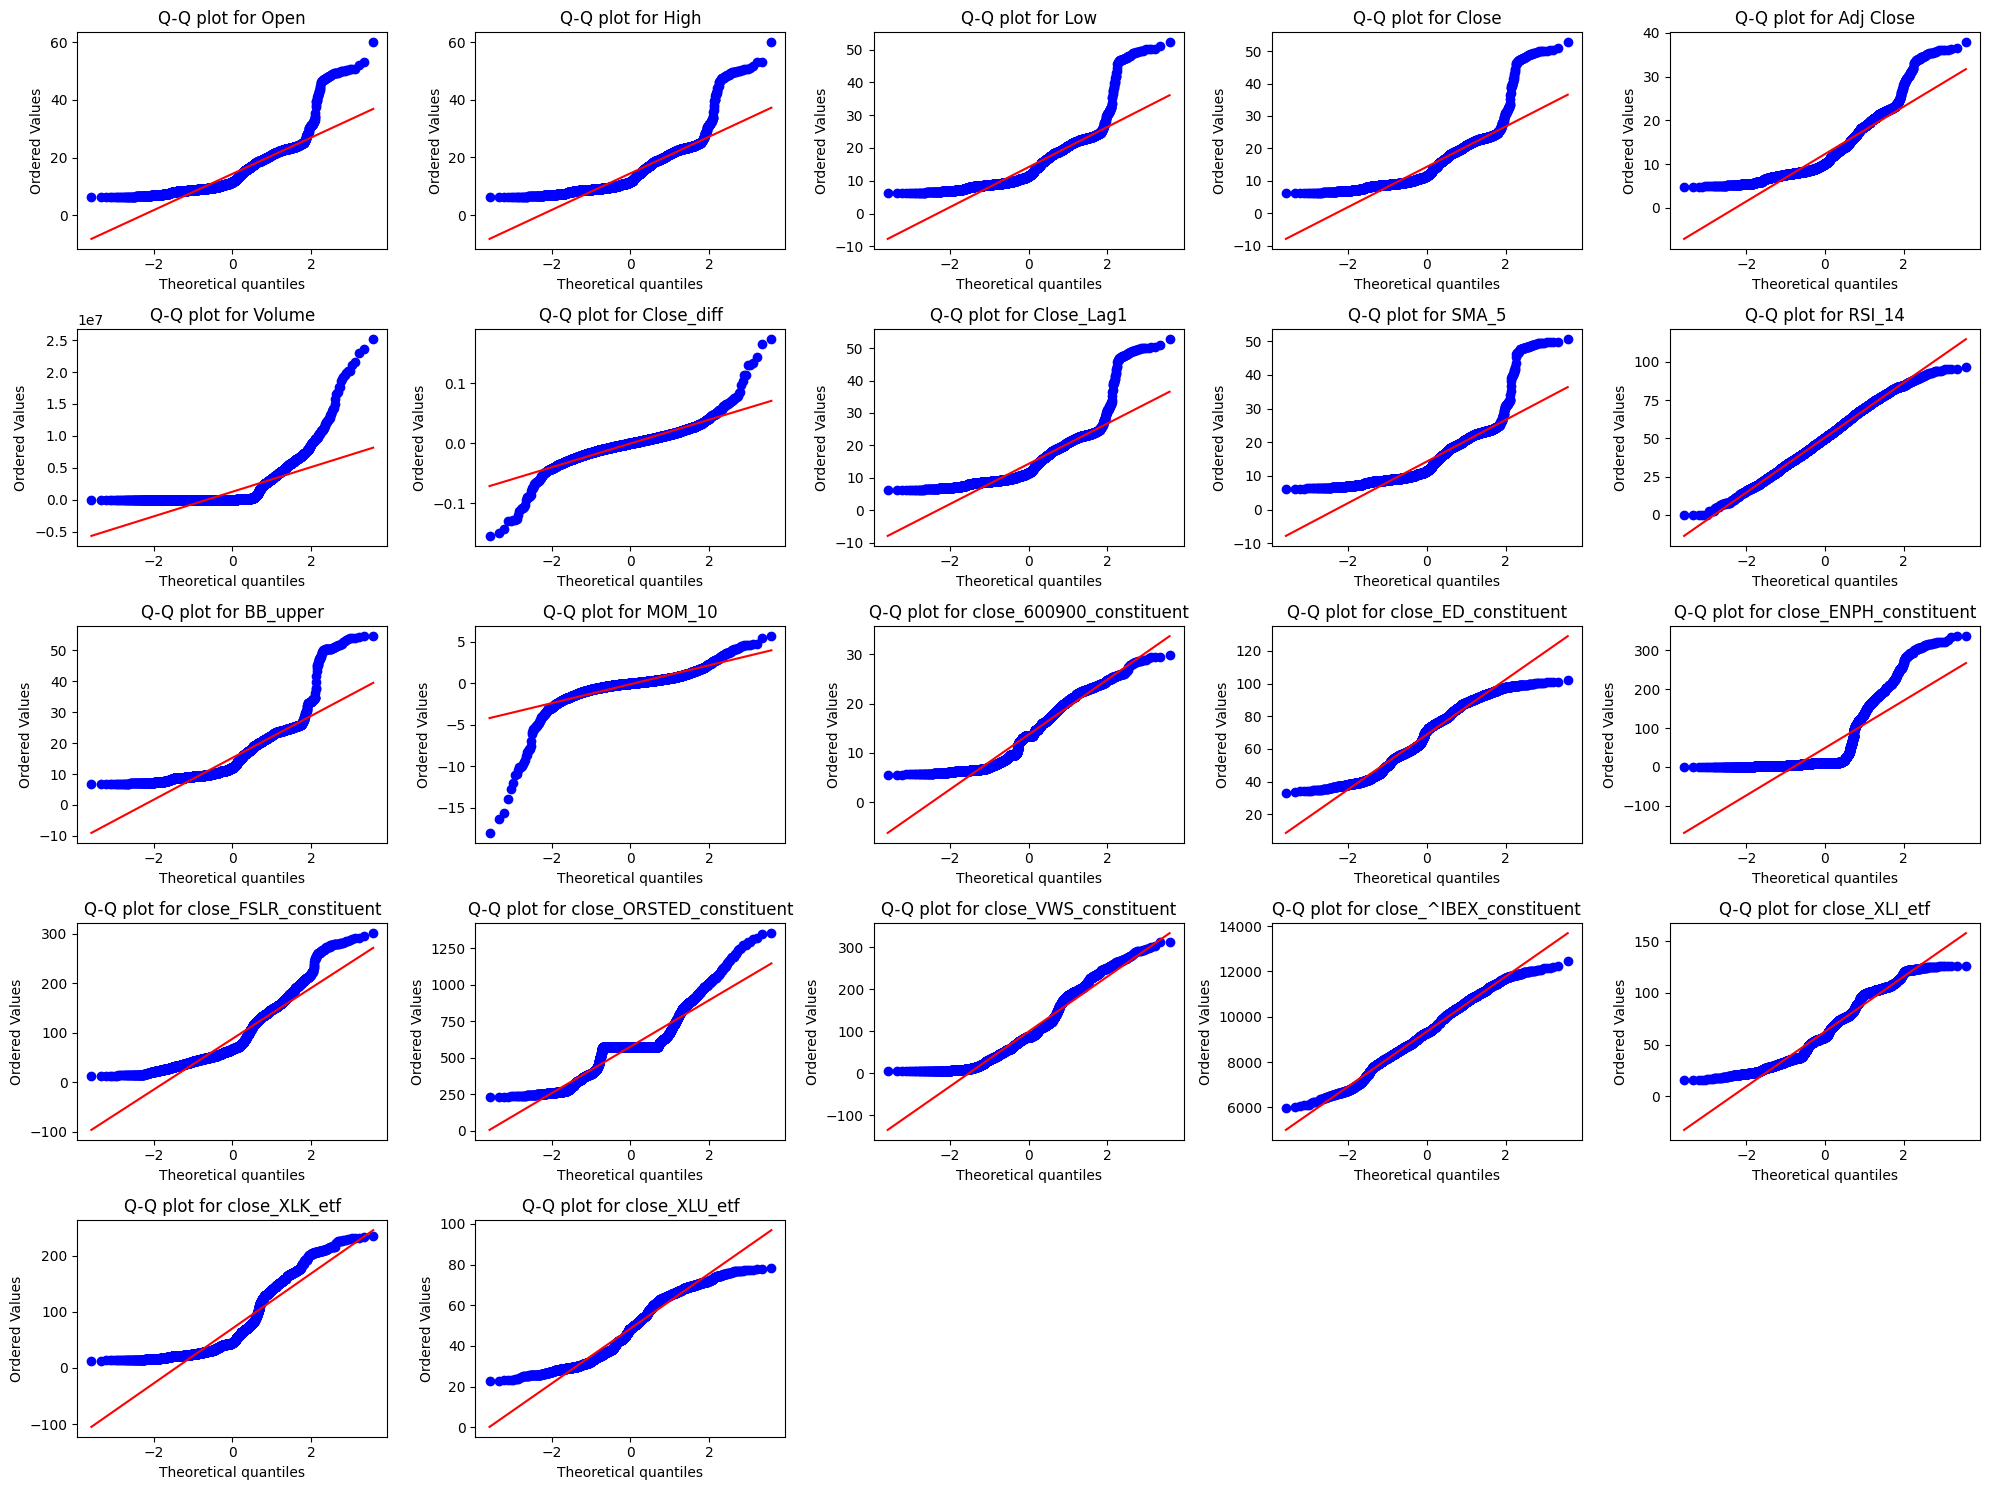

In [45]:
import scipy.stats as stats

# Define a function to plot Q-Q plots for multiple features
def plot_qq_plots(features, data):
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        plt.subplot(5, 5, i+1)
        stats.probplot(data[feature], dist="norm", plot=plt)
        plt.title(f'Q-Q plot for {feature}')
    plt.tight_layout()
    plt.show()

# Selected features for Q-Q plot visualization
selected_features = [
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Close_diff',
    'Close_Lag1', 'SMA_5', 'RSI_14', 'BB_upper', 'MOM_10', 'close_600900_constituent',
    'close_ED_constituent', 'close_ENPH_constituent', 'close_FSLR_constituent',
    'close_ORSTED_constituent', 'close_VWS_constituent', 'close_^IBEX_constituent',
    'close_XLI_etf', 'close_XLK_etf', 'close_XLU_etf'
]

# Plot Q-Q plots for the selected features
plot_qq_plots(selected_features, data_imputed_corrected)


## Multivariate Analysis

#### Principal Component Analysis (PCA)

0


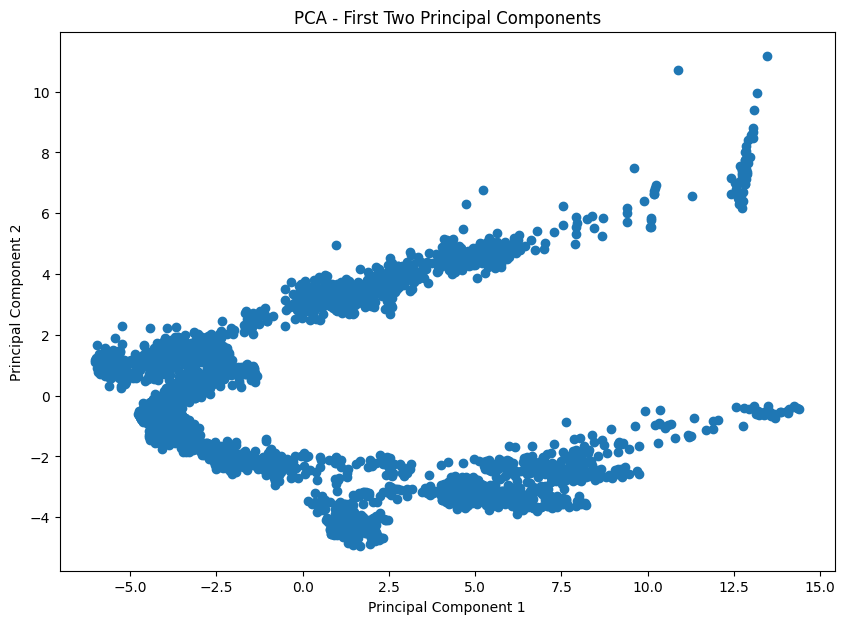

Explained variance ratio: [0.57959972 0.19233711]


In [109]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the numeric features
numeric_features_imputed = imputer.fit_transform(numeric_features)

# Now, scale the data
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features_imputed)

# Verify no missing values
print(np.isnan(numeric_features_scaled).sum())  # Should be 0
# Select numeric features for PCA
numeric_features = data_imputed.select_dtypes(include=['float64'])
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA on the imputed and scaled data
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(numeric_features_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Visualize the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)


#### Clustering Analysis

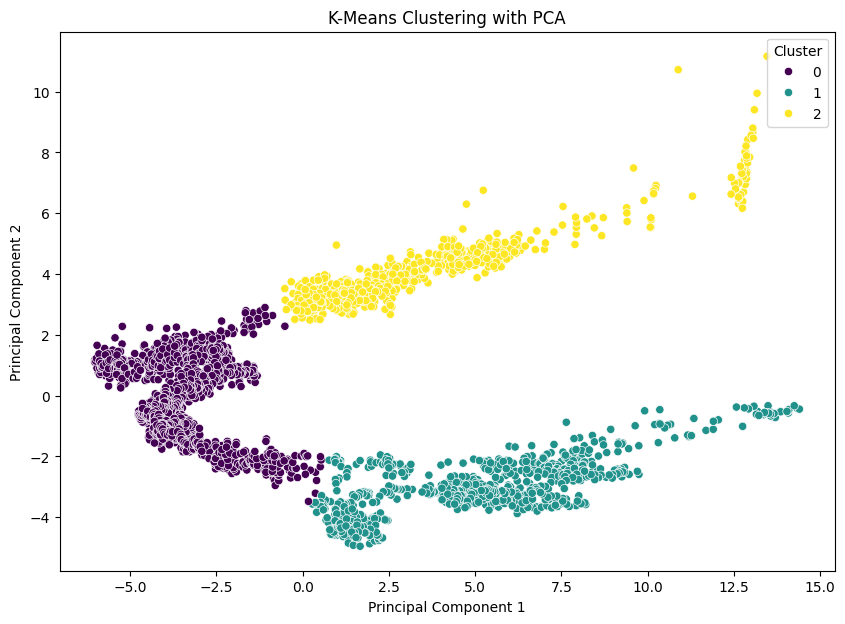

In [114]:
from sklearn.cluster import KMeans
import seaborn as sns

# Apply K-Means Clustering with 3 clusters (you can choose the number based on your data)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(numeric_features_scaled)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Visualize the clusters in the PCA space
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.show()


#### Evaluating Clusters

In [115]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(numeric_features_scaled, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.4589902487753164


## Time Series Analysis- maybe add ( doesnt work well , need sto be fixed)

In [167]:
data_imputed['Unnamed: 0']

,Unnamed: 0
0,2008-06-25
1,2008-06-26
2,2008-06-27
3,2008-06-30
4,2008-07-01
...,...
4030,2024-07-01
4031,2024-07-02
4032,2024-07-03
4033,2024-07-05


### Time Series Decomposition

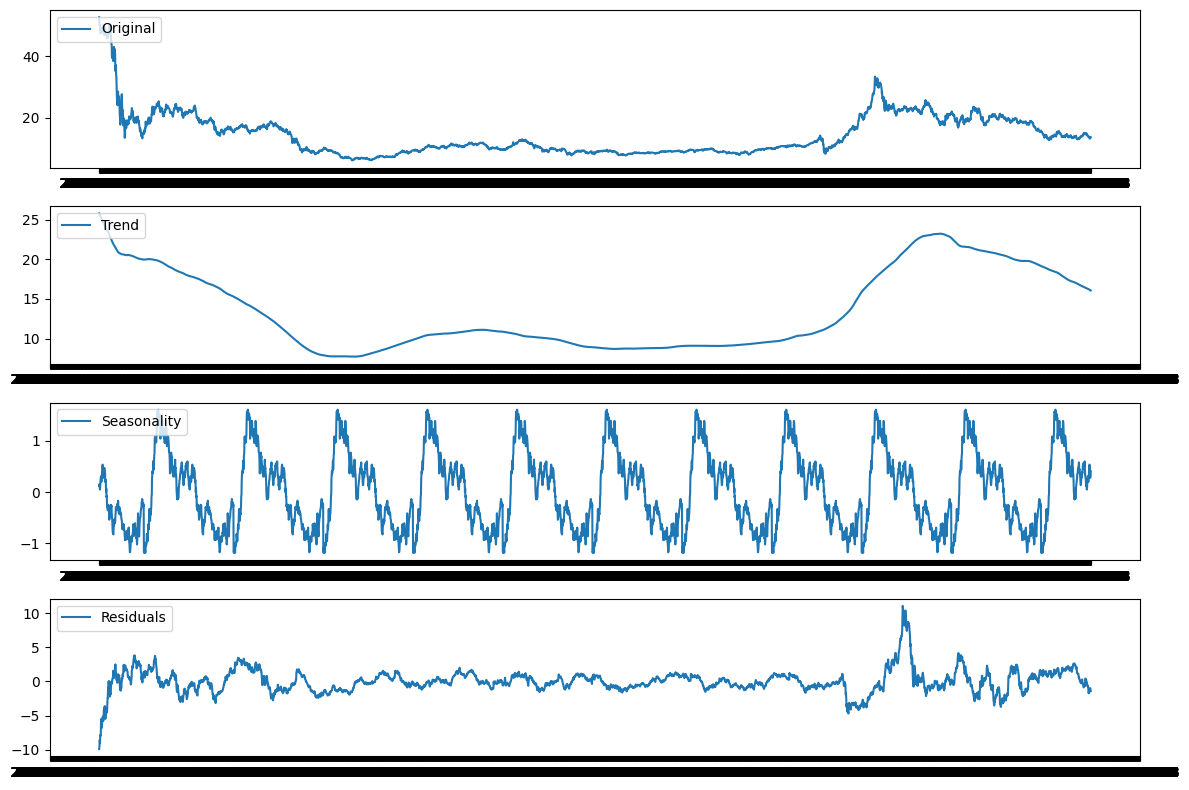

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the date column to datetime

# Set the date column as the index
data_imputed.set_index('Unnamed: 0', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(data_imputed['Close'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data_imputed['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Autocorrelation and Partial Autocorrelation

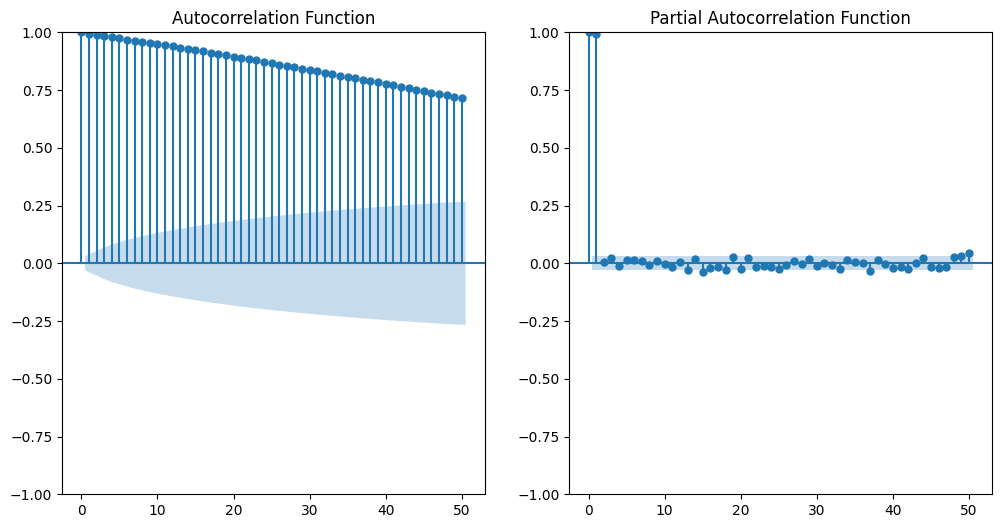

In [169]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# Autocorrelation
plt.subplot(121)
plot_acf(data_imputed['Close'].dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelation Function')

# Partial Autocorrelation
plt.subplot(122)
plot_pacf(data_imputed['Close'].dropna(), lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.show()


### Rolling Statistics

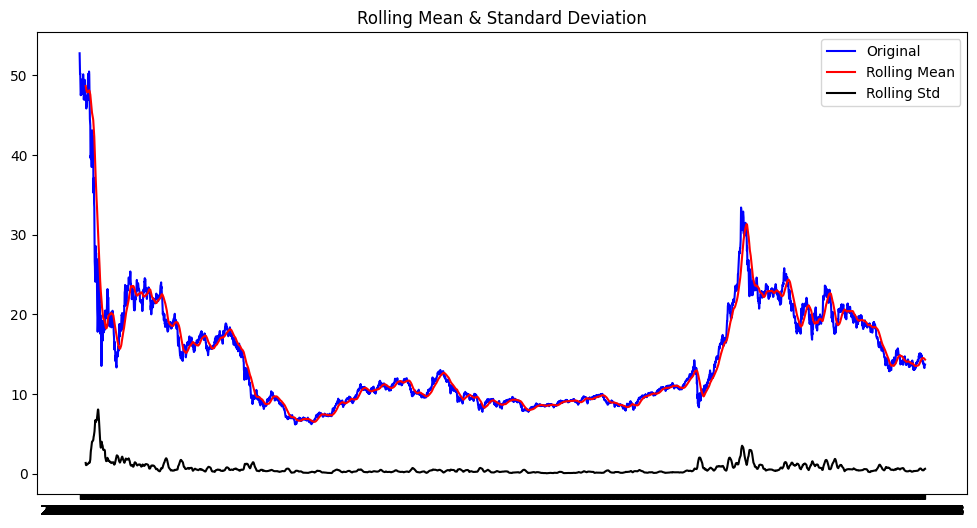

In [170]:
# Calculate the rolling mean and standard deviation
rolling_mean = data_imputed['Close'].rolling(window=30).mean()
rolling_std = data_imputed['Close'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data_imputed['Close'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show()


### Time Series Forecasting-  maybe add more models

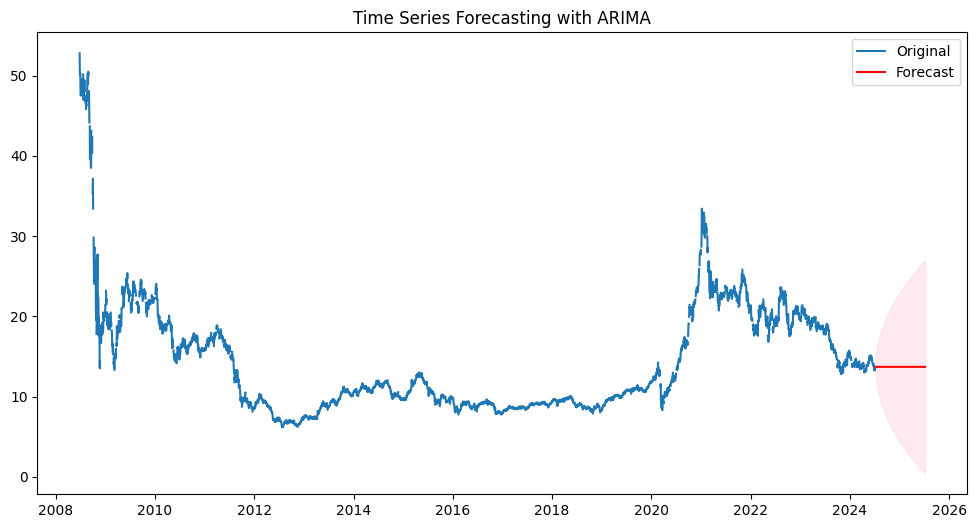

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'Unnamed: 0' is your date column and 'Close' is your time series data
data_imputed = data_imputed.asfreq('D')

# Fit an ARIMA model
model = ARIMA(data_imputed['Close'], order=(2, 1, 0))  # Adjust p, d, q as needed
model_fit = model.fit()

# Forecasting'

forecast = model_fit.get_forecast(steps=365)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Generate forecast dates
forecast_index = pd.date_range(start=data_imputed.index[-1] + pd.Timedelta(days=1), periods=365, freq='D')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data_imputed.index, data_imputed['Close'], label='Original')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Time Series Forecasting with ARIMA')
plt.legend()
plt.show()


## Summary

# **Data Exploration and Preprocessing:**

 * The dataset contains a mix of numerical features related to stock prices and external factors.
 * Histograms, box plots, and density plots revealed the distribution and potential outliers in the data.
 * Missing values were handled by dropping columns with excessive missing data and imputing remaining values using the median.

# **Feature Engineering:**

 * New features were created to capture potential relationships between existing features (e.g., High_Low_Product, Close_Volume_Ratio, 7-day_MA).
 * Transformations like log transformation were applied to address skewness in features like 'Volume'.
 * Polynomial features were generated for 'Close' to capture non-linear relationships.

# **Feature Selection:**

 * Correlation analysis helped identify and remove highly correlated features to avoid multicollinearity.
 * Feature importance from a Random Forest model highlighted the most influential features for predicting 'Close'.

# **Normality Tests:**

 * Shapiro-Wilk tests and Q-Q plots were used to assess the normality of numerical features.
 * Many features deviated from a normal distribution, suggesting potential transformations or non-parametric methods might be beneficial.

# **Multivariate Analysis:**

 * PCA was applied to reduce dimensionality and visualize the data in a lower-dimensional space.
 * K-Means clustering was used to group similar data points, and the clusters were visualized in the PCA space.
 * The silhouette score provided a quantitative evaluation of the clustering quality.

# **Time Series Analysis:**

 * Time series decomposition separated the 'Close' price into trend, seasonality, and residual components.
 * ACF and PACF plots helped identify potential autoregressive and moving average components for time series modeling.
 * Rolling statistics (mean and standard deviation) were calculated to understand the time-varying behavior of the 'Close' price.
 * An ARIMA model was fitted to forecast future 'Close' values, providing a potential tool for prediction.

# **Overall Conclusions:**

 * The dataset exhibits complex relationships between features, requiring careful feature engineering and selection.
 * Normality assumptions may not hold for all features, necessitating consideration of appropriate statistical methods.
 * PCA and clustering provide insights into the underlying structure of the data.
 * Time series analysis reveals temporal patterns and enables forecasting future stock prices.

# **Further Steps:**

 * Explore additional feature engineering techniques and transformations.
 * Consider advanced time series models (e.g., SARIMA, Prophet) for improved forecasting accuracy.
 * Experiment with different machine learning algorithms for prediction tasks.
 * Validate models using appropriate evaluation metrics and cross-validation techniques.